# Arbitrary Value Imputation

In [232]:
import pandas as pd 

In [233]:
df=pd.read_csv(r'C:\Users\HP\Desktop\dataset\titanic.csv',usecols=['Age','Fare','Survived'])


In [234]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [235]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    

<AxesSubplot:>

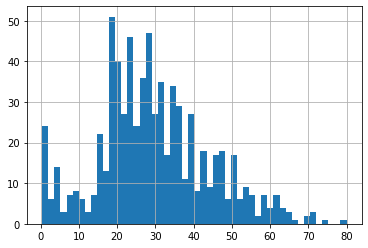

In [236]:
df['Age'].hist(bins=50)

In [237]:
impute_nan(df,"Age")

In [238]:
df

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,0.0,100.0
889,1,26.0,30.0000,26.0,26.0


In [239]:
import matplotlib.pyplot as plt
%matplotlib inline

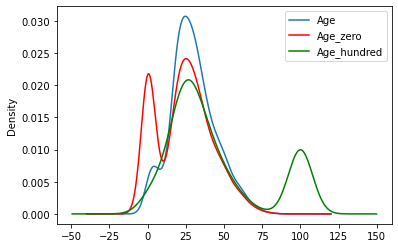

In [240]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_zero.plot(kind='kde', ax=ax, color='red')
df.Age_hundred.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# How To Handle Categroical Missing Values

## Frequent Category Imputation

In [241]:
df=pd.read_csv('loan.csv' ,usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [242]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [244]:
df.isnull().mean()


BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [245]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [246]:
df.shape

(1460, 4)

In [247]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:>

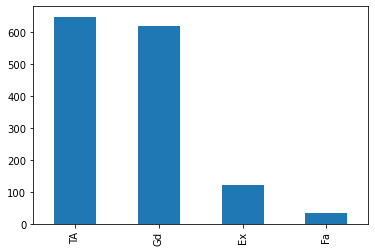

In [248]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

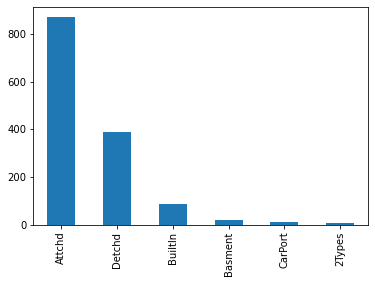

In [249]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

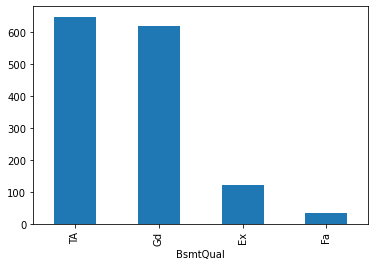

In [250]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='GarageType'>

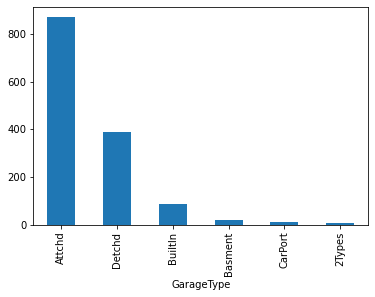

In [251]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='FireplaceQu'>

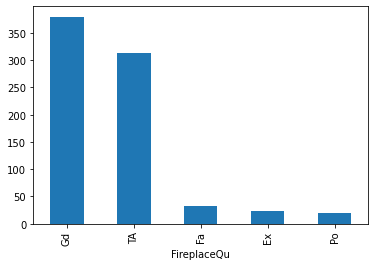

In [252]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [253]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [254]:
##replaceing function

def impute_nan(df,variable):
    
    most_freq=df[variable].value_counts().index[0]
    
    df[variable].fillna(most_freq,inplace=True)


In [255]:
for feature in [ 'BsmtQual','GarageType','FireplaceQu'] :
    
    impute_nan(df,feature)

In [256]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [257]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125


# Adding a variable to capture NAN

In [258]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [259]:
import numpy as np 

In [260]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [261]:
def impute_nan(df,variable):
    df[variable+'_new']=np.where(df[variable].isnull(),1,0)

In [262]:
for feature in [ 'BsmtQual','GarageType','FireplaceQu'] :
    impute_nan(df,feature)
    
    

In [263]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,BsmtQual_new,GarageType_new,FireplaceQu_new
0,Gd,NaN,Attchd,208500,0,0,0,1
1,Gd,TA,Attchd,181500,0,0,0,0
2,Gd,TA,Attchd,223500,0,0,0,0
3,TA,Gd,Detchd,140000,0,0,0,0
4,Gd,TA,Attchd,250000,0,0,0,0
...,...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0,0,0
1456,Gd,TA,Attchd,210000,0,0,0,0
1457,TA,Gd,Attchd,266500,0,0,0,0
1458,TA,NaN,Attchd,142125,0,0,0,1


In [264]:
#df=df.drop(["BsmtQual","GarageType","FireplaceQu"], axis=1)

In [265]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,BsmtQual_new,GarageType_new,FireplaceQu_new
0,Gd,NaN,Attchd,208500,0,0,0,1
1,Gd,TA,Attchd,181500,0,0,0,0
2,Gd,TA,Attchd,223500,0,0,0,0
3,TA,Gd,Detchd,140000,0,0,0,0
4,Gd,TA,Attchd,250000,0,0,0,0
...,...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0,0,0
1456,Gd,TA,Attchd,210000,0,0,0,0
1457,TA,Gd,Attchd,266500,0,0,0,0
1458,TA,NaN,Attchd,142125,0,0,0,1


In [266]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [267]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [268]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [270]:
frequent=df['BsmtQual'].mode()[0]

In [271]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [272]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [273]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [274]:

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [277]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [278]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [280]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [281]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [283]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [284]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [285]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [286]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
